## Minimal example:

In [57]:
import pyabc
import fitmulticell as fmc
import scipy as sp
import numpy as np
import pandas as pd
import os
import tempfile
%matplotlib inline
import matplotlib.pyplot as plt

In [58]:
file_ = "MAPK_SBML.xml"
par_map = {'V1': './CellTypes/CellType/System/Constant[@symbol="V1"]',
           'V2': './CellTypes/CellType/System/Constant[@symbol="V2"]',
           'k3': './CellTypes/CellType/System/Constant[@symbol="k3"]'}
model = fmc.model.MorpheusModel(
    file_, par_map=par_map,
    executable="/usr/bin/morpheus",
    show_stdout=False, show_stderr=True,
    raise_on_error=False)

print(model)

MorpheusModel {
	name      : MAPK_SBML.xml
}


In [59]:

true_pars = {'V1': 2.7, 'V2': 0.25, 'k3': 0.025}
limits = {key: (0.5 * val, 2 * val) for key, val in true_pars.items()}

# generate data
observed_data = model.sample(true_pars)



In [60]:
prior = pyabc.Distribution(**{key: pyabc.RV("uniform", lb, ub - lb)
                              for key, (lb, ub) in limits.items()})

def distance(val1, val2):
    d = np.sum([np.sum(np.abs(val1[key] - val2[key])) \
                for key in ['IdSumstat__MAPK_P', 'IdSumstat__MKK_P']])
    return d

In [61]:
abc = pyabc.ABCSMC(model, prior, distance, population_size=20)
db_path = "sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db")
history = abc.new(db_path, observed_data)

INFO:Sampler:Parallelizing the sampling on 8 cores.
INFO:History:Start <ABCSMC(id=3, start_time=2020-10-21 09:10:48.250032, end_time=None)>


In [62]:
abc.run(max_nr_populations=5)

INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 16798.624318634502
INFO:ABC:t: 0, eps: 16798.624318634502.
INFO:ABC:Acceptance rate: 20 / 30 = 6.6667e-01, ESS=2.0000e+01.
INFO:ABC:t: 1, eps: 12028.525139519003.
INFO:ABC:Acceptance rate: 20 / 48 = 4.1667e-01, ESS=9.8730e+00.
INFO:ABC:t: 2, eps: 9983.687706784385.
INFO:ABC:Acceptance rate: 20 / 45 = 4.4444e-01, ESS=5.8130e+00.
INFO:ABC:t: 3, eps: 5479.999880972941.
INFO:ABC:Acceptance rate: 20 / 52 = 3.8462e-01, ESS=1.5889e+01.
INFO:ABC:t: 4, eps: 3899.8937315739877.
INFO:ABC:Acceptance rate: 20 / 63 = 3.1746e-01, ESS=1.7086e+01.
INFO:History:Done <ABCSMC(id=3, start_time=2020-10-21 09:10:48.250032, end_time=2020-10-21 09:10:59.946603)>


/home/sebastian/Desktop/anaconda3/lib/python3.7/site-packages/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)
/home/sebastian/Desktop/anaconda3/lib/python3.7/site-packages/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)


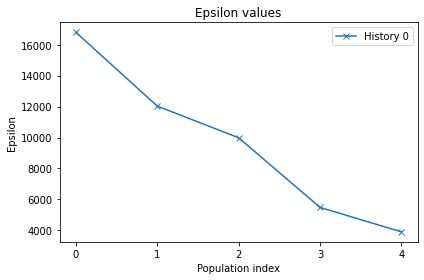

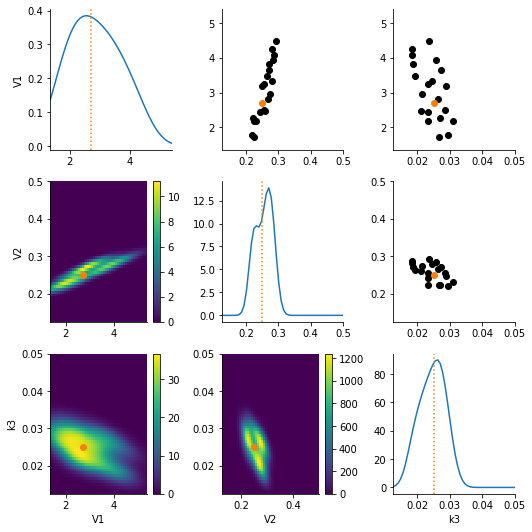

In [63]:
h = pyabc.History(db_path)
pyabc.visualization.plot_epsilons(h)
df, w = h.get_distribution(t=h.max_t)
pyabc.visualization.plot_kde_matrix(df, w, limits=limits, refval=true_pars)
plt.show()

## Active cell motion:

In [87]:
file_ = "PRW_R&T_Draft_2.xml"
par_map = {'phi': './CellTypes/CellType/Constant[@symbol="phi"]',
           'tau': './CellTypes/CellType/Constant[@symbol="tau"]',
           'tau_gamma': './CellTypes/CellType/Constant[@symbol="tau_gamma"]'}
model = fmc.model.MorpheusModel(
    file_, par_map=par_map,
    executable="/usr/bin/morpheus",
    show_stdout=False, show_stderr=True,
    raise_on_error=False)

print(model)

MorpheusModel {
	name      : PRW_R&T_Draft_2.xml
}


In [88]:
true_pars = {'phi': 0.95, 'tau': 1.645, 'tau_gamma': 4}
limits = {key: (0.5 * val, 2 * val) for key, val in true_pars.items()}

# generate data
observed_data = model.sample(true_pars)

In [89]:
prior = pyabc.Distribution(**{key: pyabc.RV("uniform", lb, ub - lb)
                              for key, (lb, ub) in limits.items()})

def distance(val1, val2):
    d = np.sum([np.sum(np.abs(val1[key] - val2[key])) \
                for key in ['IdSumstat__RT_inst', 'IdSumstat__angle']])
    return d

In [90]:
abc = pyabc.ABCSMC(model, prior, distance, population_size=20)
db_path = "sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db")
history = abc.new(db_path, observed_data)

INFO:Sampler:Parallelizing the sampling on 8 cores.
INFO:History:Start <ABCSMC(id=7, start_time=2020-10-21 10:04:56.585775, end_time=None)>


In [93]:
abc.run(max_nr_populations=5)

INFO:Epsilon:initial epsilon is 453423.82702446793
INFO:ABC:t: 2, eps: 453423.82702446793.
INFO:ABC:Acceptance rate: 20 / 27 = 7.4074e-01, ESS=1.0931e+01.
INFO:ABC:t: 3, eps: 240245.9350139088.
INFO:ABC:Acceptance rate: 20 / 40 = 5.0000e-01, ESS=7.1639e+00.
INFO:ABC:t: 4, eps: 181034.97874363.
INFO:ABC:Acceptance rate: 20 / 43 = 4.6512e-01, ESS=1.5617e+01.
INFO:ABC:t: 5, eps: 90817.90492685913.
INFO:ABC:Acceptance rate: 20 / 64 = 3.1250e-01, ESS=3.2378e+00.
INFO:ABC:t: 6, eps: 57675.20392390985.
INFO:ABC:Acceptance rate: 20 / 386 = 5.1813e-02, ESS=1.2036e+01.
INFO:History:Done <ABCSMC(id=7, start_time=2020-10-21 10:04:56.585775, end_time=2020-10-21 10:23:20.614201)>


/home/sebastian/Desktop/anaconda3/lib/python3.7/site-packages/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)
/home/sebastian/Desktop/anaconda3/lib/python3.7/site-packages/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)


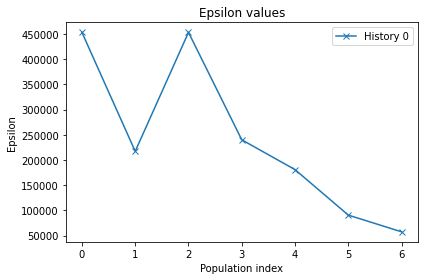

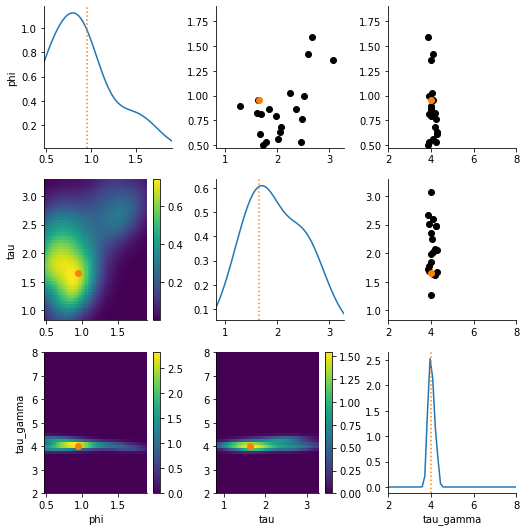

In [94]:
h = pyabc.History(db_path)
pyabc.visualization.plot_epsilons(h)
df, w = h.get_distribution(t=h.max_t)
pyabc.visualization.plot_kde_matrix(df, w, limits=limits, refval=true_pars)
plt.show()

KeyError: 'V1'

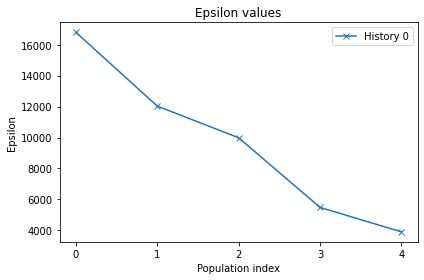

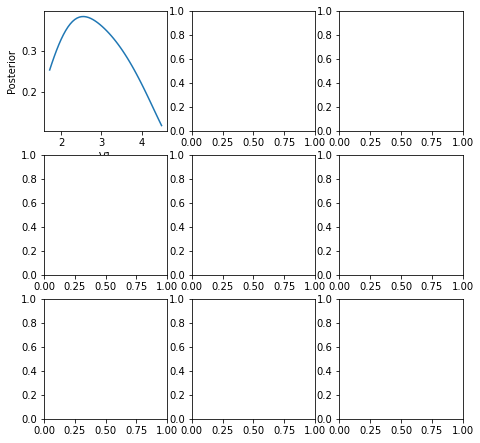

In [70]:
h = pyabc.History(db_path)
pyabc.visualization.plot_epsilons(h)
df, w = h.get_distribution(t=h.max_t)
pyabc.visualization.plot_kde_matrix(df, w, limits=limits, refval=true_pars)
plt.show()